In [1]:
import pandas as pd

# Importo el fichero y lo guardo en un DataFrame:

path = r'C:\Users\34647\Desktop\DESARROLLO\Curso Phyton Data Analist\Área III.- Exploración básica y eliminación de datos con Phyton\ficheros de prácticas\DatosVino2.csv'
dates = pd.read_csv(path, sep=';', encoding='utf-8') #Uso el parámetro encoding='utf-8' para ver los valores de la etiqueta 'Clasificacion'	
dates

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,13606,0,0,"0,39","0,14","4,99","0,073","1,02195","5,9","0,12","6,6",B,5,?,1.0,"4,56"
1,3119,0,0,"2,19","2,58","5,54","0,205","0,95373","6,4","0,49",112,b,4,?,NaN,"3,01"
2,1190,0,0,"1,44","-1,54","5,1","0,058","0,99271","7,1","0,39","10,2",B,2,?,1.0,1
3,5261,0,0,"0,5","0,3","5,23","0,276","0,9959","3,5","-0,81","4,4",R,4,?,3.0,"1,85"
4,2871,0,0,"-0,1","0,3","5,75","0,048","1,02724","7,2","0,44","10,1",M,2,?,1.0,"1,28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,"0,41","0,17","8,55","-0,079","0,96961","9,5","0,45","12,7",M,2,*,3.0,"1,55"
6361,4285,0,0,"-0,77","0,29","8,96","0,042","0,99304","8,9","0,47","10,3",B,2,?,1.0,"3,79"
6362,13580,0,0,"0,41","0,07","8,88","0,587","0,9962","4,8","3,72","7,6",M,3,?,2.0,"2,15"
6363,10080,0,0,"-0,2","0,38","8,19","0,052","1,00796","13,6","0,44","13,8",B,2,*,1.0,"2,44"


In [2]:
#Hago una copia del df, para no tocar el original:
vinos = dates.copy()
vinos

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,13606,0,0,"0,39","0,14","4,99","0,073","1,02195","5,9","0,12","6,6",B,5,?,1.0,"4,56"
1,3119,0,0,"2,19","2,58","5,54","0,205","0,95373","6,4","0,49",112,b,4,?,NaN,"3,01"
2,1190,0,0,"1,44","-1,54","5,1","0,058","0,99271","7,1","0,39","10,2",B,2,?,1.0,1
3,5261,0,0,"0,5","0,3","5,23","0,276","0,9959","3,5","-0,81","4,4",R,4,?,3.0,"1,85"
4,2871,0,0,"-0,1","0,3","5,75","0,048","1,02724","7,2","0,44","10,1",M,2,?,1.0,"1,28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,"0,41","0,17","8,55","-0,079","0,96961","9,5","0,45","12,7",M,2,*,3.0,"1,55"
6361,4285,0,0,"-0,77","0,29","8,96","0,042","0,99304","8,9","0,47","10,3",B,2,?,1.0,"3,79"
6362,13580,0,0,"0,41","0,07","8,88","0,587","0,9962","4,8","3,72","7,6",M,3,?,2.0,"2,15"
6363,10080,0,0,"-0,2","0,38","8,19","0,052","1,00796","13,6","0,44","13,8",B,2,*,1.0,"2,44"


In [3]:
# Compruebo si hay elementos duplicados:

print (f"Hay {vinos.duplicated().sum()} elementos duplicados\n")
vinos.duplicated()

Hay 0 elementos duplicados



0       False
1       False
2       False
3       False
4       False
        ...  
6360    False
6361    False
6362    False
6363    False
6364    False
Length: 6365, dtype: bool

In [6]:
# Hago un cambio de tipo a todas las variables, excepto:
# - ID que la dejo tipo int. 
# - Compra que la cambio a tipo category
# - Region la dejo tipo float.
# - Etiqueta --> Contiene siglas que indican la valoración del vino: MM: Muy malo, M: Malo, R: Regular, B: Bueno y MB: Muy bueno. 
#   Lo que voy a hacer con estos valores es sustituirlos por: NM = 0; M = 0,1; R = 0,2; B = 0,3 y MB = 0,4. También cambio todo a 
#   mayúsculas. Hecho esto, la transformaré también a tipo float
# - Clasificacion --> Contiene la puntuación de cada vino dada por expertos, siendo **** = Mayor puntuación y * = Menor puntuación. 
#   También aparecen algunas con el símbolo ?, que quiere decir que no tienen puntuación. Lo que voy a hacer es lo siguiente: 
#   Sustituir **** por 0,4; *** por 0,3; ** por 0,2; * por 0,1; ? por 0.

# Variable Etiqueta:

vinos['Etiqueta'] = vinos['Etiqueta'].str.upper() # Cambio todos los valores a mayúsculas

def cambio (x):
    if (x == 'MM'):
        return 0
    elif(x == 'M'):
        return 0.1
    elif(x == 'R'):
        return 0.2
    elif(x == 'B'):
        return 0.3
    elif(x == 'MB'):
        return 0.4

vinos['Etiqueta'] = vinos['Etiqueta'].map(cambio)

# # Variable Clasificacion:

def cambio_2 (x):
    if (x == '****'):
        return 0.4
    elif(x == '***'):
        return 0.3
    elif(x == '**'):
        return 0.2
    elif(x == '*'):
        return 0.1
    elif(x == '?'):
        return 0
    
vinos['Clasificacion'] = vinos['Clasificacion'].map(cambio_2)

# Variable Compra:

vinos[['Compra']] = vinos[['Compra']].astype ('category')

#Transformación a tipo float:
# Al intentar ejecutar la operación, me lanza un error y me dice que no se puede convertir
# un string a tipo float, y tras una tarea de investigación, me percato que esto es porque
# en las columnas donde me da este error, que son Acidez, AcidoCitrico, pH, CloruroSodico,
# Densidad, Azucar, Sulfatos, Alcohol y PrecioBotella, los datos vienen separados por comas en lugar de puntos.

# Para solucionar esto, transformo estas comas por puntos:
vinos['PrecioBotella'] = vinos['PrecioBotella'].str.replace(',', '.')
vinos['Acidez'] = vinos['Acidez'].str.replace(',', '.')
vinos['AcidoCitrico'] = vinos['AcidoCitrico'].str.replace(',', '.')
vinos['pH'] = vinos['pH'].str.replace(',', '.')
vinos['CloruroSodico'] = vinos['CloruroSodico'].str.replace(',', '.')
vinos['Densidad'] = vinos['Densidad'].str.replace(',', '.')
vinos['Azucar'] = vinos['Azucar'].str.replace(',', '.')
vinos['Sulfatos'] = vinos['Sulfatos'].str.replace(',', '.')
vinos['Alcohol'] = vinos['Alcohol'].str.replace(',', '.')

# Hago el cambio a tipo float:
vinos[['Acidez', 'AcidoCitrico', 'pH', 'CloruroSodico', 'Densidad', 'Azucar', 'Sulfatos', 'Alcohol', 'PrecioBotella']] = vinos[['Acidez', 'AcidoCitrico', 'pH', 'CloruroSodico', 'Densidad', 'Azucar', 'Sulfatos', 'Alcohol', 'PrecioBotella']].astype (float)

# Las siguientes variables se cambiaron sin problemas de un principio a float:
vinos[['Beneficio']] = vinos[['Beneficio']].astype (float)
vinos[['CalifProductor']] = vinos[['CalifProductor']].astype (float)
vinos['Clasificacion'] = vinos['Clasificacion'].astype(float)

print ('*** Antes de operar ***')
print (dates.info())
print ('\n*** Después de operar ***')
vinos.info()


*** Después de operar ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              6365 non-null   int64   
 1   Beneficio       6365 non-null   float64 
 2   Compra          6365 non-null   category
 3   Acidez          6365 non-null   float64 
 4   AcidoCitrico    6365 non-null   float64 
 5   pH              6365 non-null   float64 
 6   CloruroSodico   6365 non-null   float64 
 7   Densidad        6365 non-null   float64 
 8   Azucar          6365 non-null   float64 
 9   Sulfatos        5761 non-null   float64 
 10  Alcohol         6365 non-null   float64 
 11  Etiqueta        6365 non-null   float64 
 12  CalifProductor  6365 non-null   float64 
 13  Clasificacion   6365 non-null   float64 
 14  Region          6258 non-null   float64 
 15  PrecioBotella   6365 non-null   float64 
dtypes: category(1), float64(14), int6

*** Antes de operar ***

Nulos:
ID                  0
Beneficio           0
Compra              0
Acidez              0
AcidoCitrico        0
pH                  0
CloruroSodico       0
Densidad            0
Azucar              0
Sulfatos          604
Alcohol             0
Etiqueta            0
CalifProductor      0
Clasificacion       0
Region            107
PrecioBotella       0
dtype: int64

*** Después de operar ***

Mediana sulfatos =  0.5
Mediana Region = 2.0

Nulos:
ID                0
Beneficio         0
Compra            0
Acidez            0
AcidoCitrico      0
pH                0
CloruroSodico     0
Densidad          0
Azucar            0
Sulfatos          0
Alcohol           0
Etiqueta          0
CalifProductor    0
Clasificacion     0
Region            0
PrecioBotella     0
dtype: int64

*** OUTLIER ***


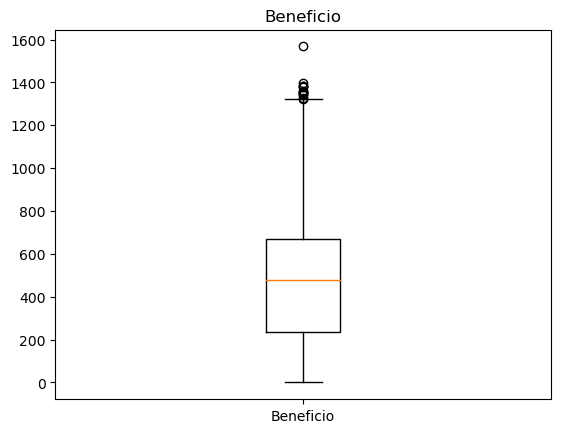

----------------------------------------------------------------------------------


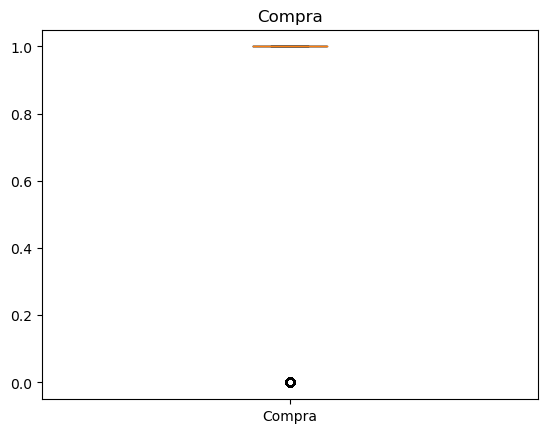

----------------------------------------------------------------------------------


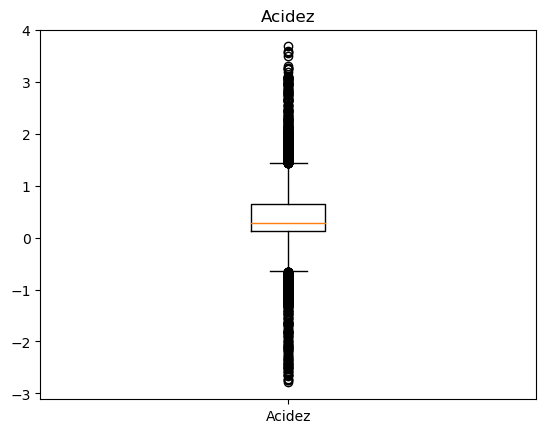

----------------------------------------------------------------------------------


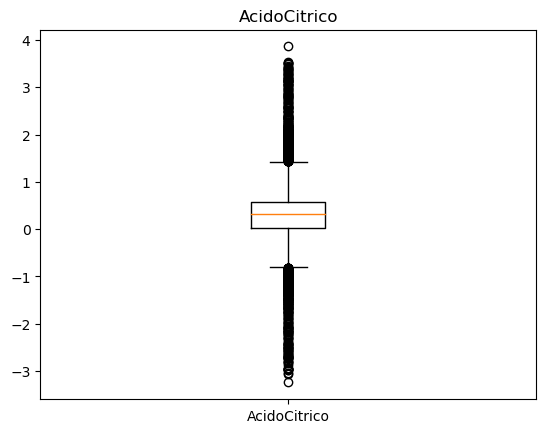

----------------------------------------------------------------------------------


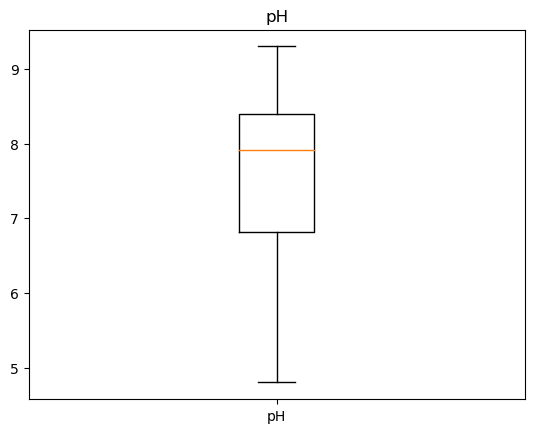

----------------------------------------------------------------------------------


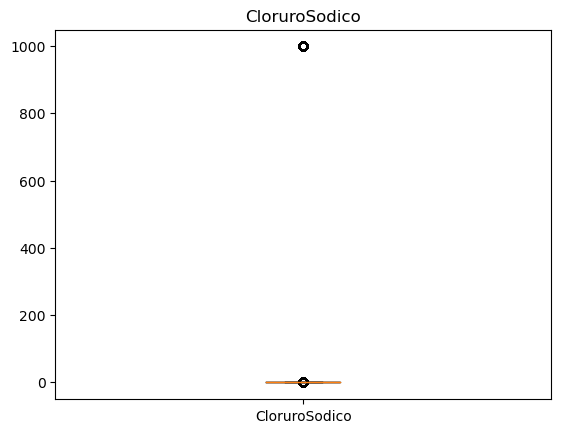

----------------------------------------------------------------------------------


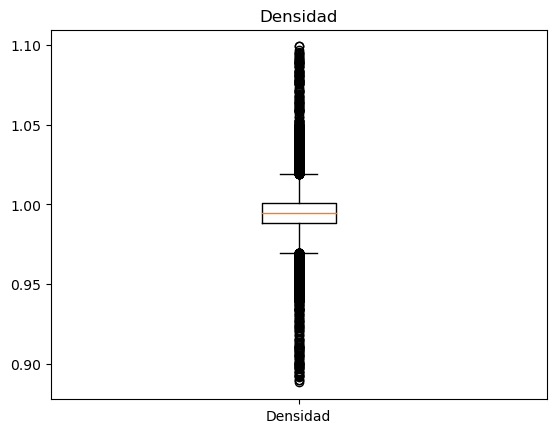

----------------------------------------------------------------------------------


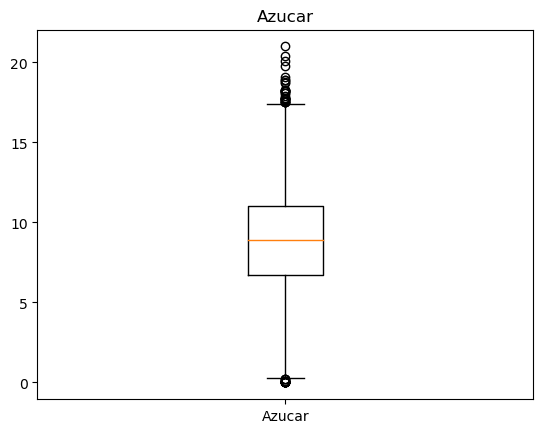

----------------------------------------------------------------------------------


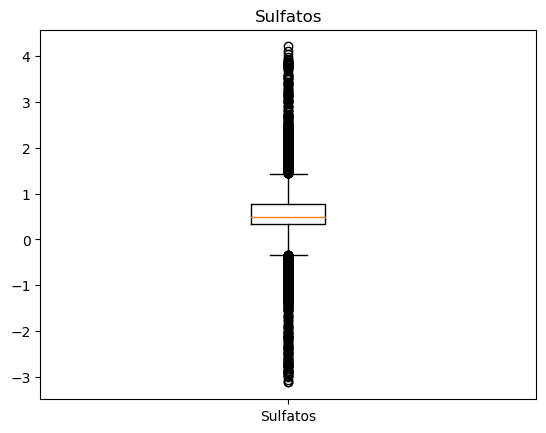

----------------------------------------------------------------------------------


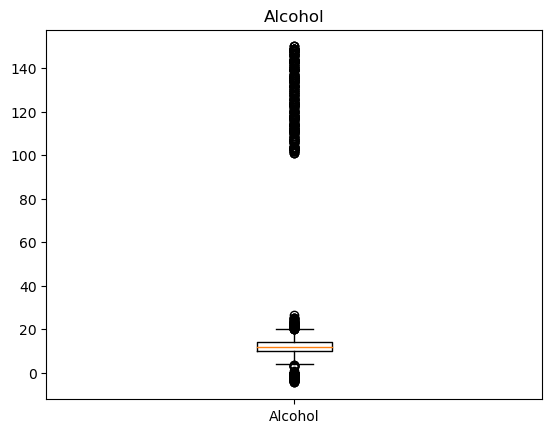

----------------------------------------------------------------------------------


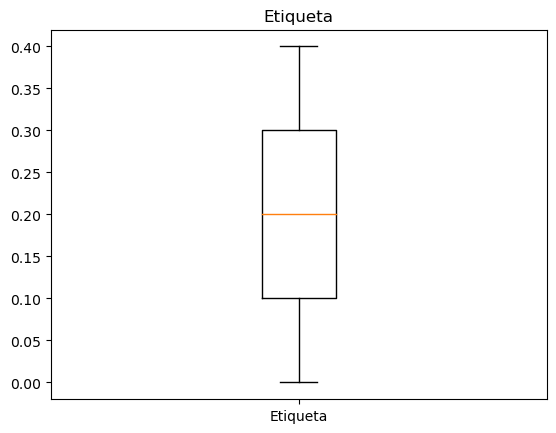

----------------------------------------------------------------------------------


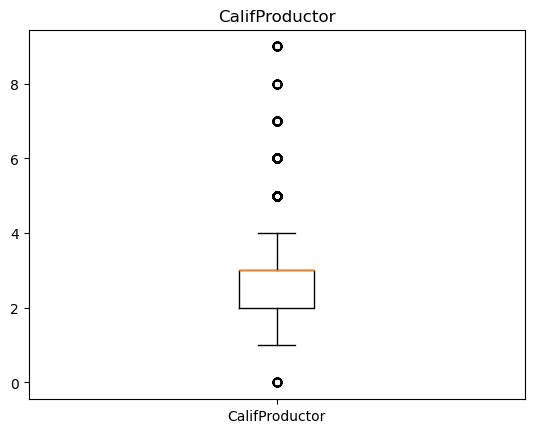

----------------------------------------------------------------------------------


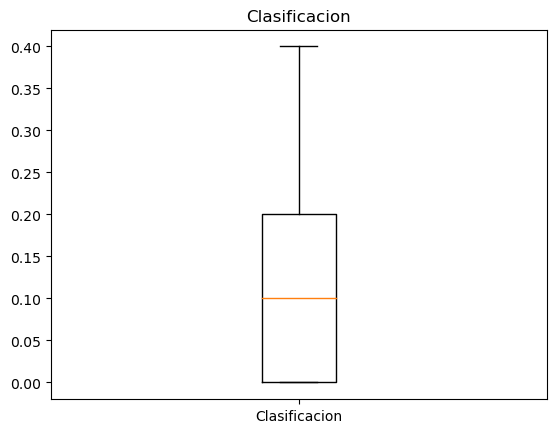

----------------------------------------------------------------------------------


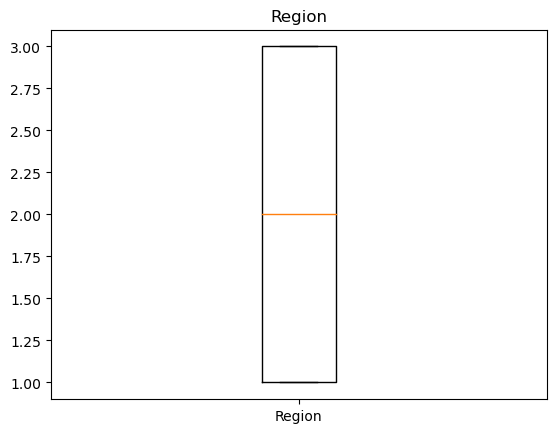

----------------------------------------------------------------------------------


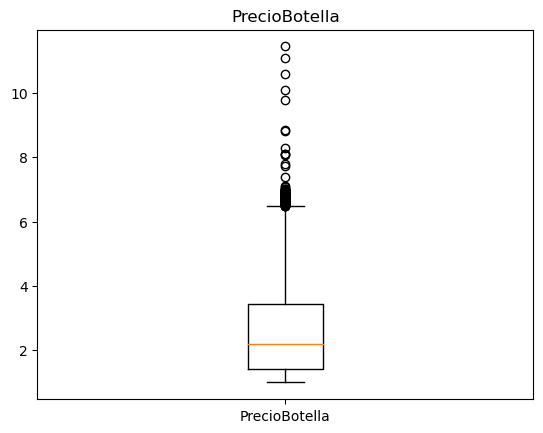

In [7]:
#Voy a comprobar los valores nulos, para empezar con la limpieza:
print ('*** Antes de operar ***\n')
print("Nulos:")
print (dates.isnull().sum())

print ('\n*** Después de operar ***\n')
#En la variable Sulfatos me encuentro 604 nulos, y en la vaiable Region, me encuentro 107.
# Teniendo en cuenta que el df tiene 6365 valores, son pocos datos, no obstante, decido no 
# eliminarlos, y los voy a imputar por la mediana. Realmente no repercutirá mucho en el resultado.

mediana_Sulfatos = vinos["Sulfatos"].median() #Calculo la mediana de la variable Region
mediana_Region = vinos["Region"].median() #Calculo la mediana de la variable Sulfatos
print ("Mediana sulfatos = ", mediana_Sulfatos)
print (f"Mediana Region = {mediana_Region}\n")

vinos['Sulfatos'] = vinos.Sulfatos.fillna(mediana_Sulfatos) #Cambio valores nulos por la mediana
vinos['Region'] = vinos.Region.fillna(mediana_Region) #fCambio valores nulos por la mediana

# #Tras trabajar con los nulos, vuelvo a comprobar si todo se ha realizado con éxito:
print("Nulos:")
print (vinos.isnull().sum())

print ('\n*** OUTLIER ***')
# En cuanto a valores missings, ya está el DataFrame completo, y ahora toca visualizar los valores outliers. 
# para ello, voy a representarlos en un diagrama de cajas, que visualmente es como mejor se ve este dato.

import matplotlib.pyplot as plt

plt.boxplot([vinos['Beneficio']], vert=True) 
plt.xticks([1], ['Beneficio']) # agrego etiquetas a los ejes
plt.title('Beneficio')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['Compra']], vert=True) 
plt.xticks([1], ['Compra']) # agrego etiquetas a los ejes
plt.title('Compra')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['Acidez']], vert=True) 
plt.xticks([1], ['Acidez']) # agrego etiquetas a los ejes
plt.title('Acidez')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['AcidoCitrico']], vert=True) 
plt.xticks([1], ['AcidoCitrico']) # agrego etiquetas a los ejes
plt.title('AcidoCitrico')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['pH']], vert=True) 
plt.xticks([1], ['pH']) # agrego etiquetas a los ejes
plt.title('pH')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['CloruroSodico']], vert=True) 
plt.xticks([1], ['CloruroSodico']) # agrego etiquetas a los ejes
plt.title('CloruroSodico')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['Densidad']], vert=True) 
plt.xticks([1], ['Densidad']) # agrego etiquetas a los ejes
plt.title('Densidad')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['Azucar']], vert=True) 
plt.xticks([1], ['Azucar']) # agrego etiquetas a los ejes
plt.title('Azucar')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['Sulfatos']], vert=True) 
plt.xticks([1], ['Sulfatos']) # agrego etiquetas a los ejes
plt.title('Sulfatos')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['Alcohol']], vert=True) 
plt.xticks([1], ['Alcohol']) # agrego etiquetas a los ejes
plt.title('Alcohol')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['Etiqueta']], vert=True) 
plt.xticks([1], ['Etiqueta']) # agrego etiquetas a los ejes
plt.title('Etiqueta')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['CalifProductor']], vert=True) 
plt.xticks([1], ['CalifProductor']) # agrego etiquetas a los ejes
plt.title('CalifProductor')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['Clasificacion']], vert=True) 
plt.xticks([1], ['Clasificacion']) # agrego etiquetas a los ejes
plt.title('Clasificacion')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['Region']], vert=True) 
plt.xticks([1], ['Region']) # agrego etiquetas a los ejes
plt.title('Region')
plt.show()
print('----------------------------------------------------------------------------------')
plt.boxplot([vinos['PrecioBotella']], vert=True) 
plt.xticks([1], ['PrecioBotella']) # agrego etiquetas a los ejes
plt.title('PrecioBotella')
plt.show()

# He sacado una gráfica de todas las columnas excepto de la columna ID (porque no tiene mucho sentido).

# Como se puede observar en las gráficas, hay bastantes valores fuera de rango, pero decido dejarlos tal y como están y no hacer
# nada con ellos por una razón muy sencilla, son valores que la mayoría suponen ingredientes de cada vino, entonces, es normal 
# encontrarnos con esto así. 
# Las columnas que no son ingredientes del vino son Beneficio, Compra, Etiqueta, Clasificación, Region y PrecioBotella, que aunque también tiene valores
# fuera de rango, pasa como en las anteriores, que son valores que varirarán en función de si el vino es más caro, del sitio de
# donde provenga y del beneficio que deja cada uno, de su valoración, etc, por lo que lo lógico es no tocarlas para no desvirtuar los datos y el sentido
# del DataFrame

In [8]:
# Vuelvo a comprobar si hay duplicados
print (f"Hay {vinos.duplicated().sum()} elementos duplicados\n")

Hay 0 elementos duplicados



In [12]:
# Hecho todo lo anterior, vamos a pasar a la selección y transformación de variables:

# En primer lugar, voy a transformar algunas variables que tienen valores un poco desproporcionados comparándolas con
# la mayoría , para reescalarlos, usando la técnica RESCALED DATA para trabajar con datos reescalados:

df = vinos.copy() #Hago nueva copia del DataFramefrom sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, power_transform

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, power_transform
import matplotlib.pyplot as plt

scaler = MinMaxScaler(feature_range = (0,1))

# Selecciono las variables que voy a tratar
df = df.loc[:,['Beneficio', 'Acidez', 'AcidoCitrico', 'pH','CloruroSodico', 'Densidad', 'Azucar', 'Sulfatos', 'Alcohol','CalifProductor', 'Region', 'PrecioBotella']]
redcaledX = scaler.fit_transform(df)

# El valor menor de cada columna será un valor 0. El valor mayor tomará valor 1. De tal manera- Las variables Etiqueta y Clasificación no tengo la necesidad
# de escalarlas porque cuando las traté al principio, ya  le di valores entre 0 y 1.

vinos['Beneficio'] = list(redcaledX[:,0])
vinos['Acidez'] = list(redcaledX[:,1])
vinos['AcidoCitrico'] = list(redcaledX[:,2])
vinos['pH'] = list(redcaledX[:,3])
vinos['CloruroSodico'] = list(redcaledX[:,4])
vinos['Densidad'] = list(redcaledX[:,5])
vinos['Azucar'] = list(redcaledX[:,6])
vinos['Sulfatos'] = list(redcaledX[:,7])
vinos['Alcohol'] = list(redcaledX[:,8])
vinos['CalifProductor'] = list(redcaledX[:,9])
vinos['Region'] = list(redcaledX[:,10])
vinos['PrecioBotella'] = list(redcaledX[:,11])
vinos



,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,13606,0.0,0,0.491499,0.476056,0.042222,0.001244,0.633957,0.280952,0.442019,0.071845,0.3,0.555556,0.0,0.0,0.340996
1,3119,0.0,0,0.769706,0.819718,0.164444,0.001376,0.310869,0.304762,0.492497,0.754045,0.3,0.444444,0.0,0.5,0.192529
2,1190,0.0,0,0.653787,0.239437,0.066667,0.001229,0.495477,0.338095,0.478854,0.095146,0.3,0.222222,0.0,0.0,0.000000
3,5261,0.0,0,0.508501,0.498592,0.095556,0.001447,0.510585,0.166667,0.315143,0.057605,0.2,0.444444,0.0,1.0,0.081418
4,2871,0.0,0,0.415765,0.498592,0.211111,0.001219,0.659010,0.342857,0.485675,0.094498,0.1,0.222222,0.0,0.0,0.026820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0.0,0,0.494590,0.480282,0.833333,0.001092,0.386076,0.452381,0.487040,0.111327,0.1,0.222222,0.1,1.0,0.052682
6361,4285,0.0,0,0.312210,0.497183,0.924444,0.001213,0.497040,0.423810,0.489768,0.095793,0.3,0.222222,0.0,0.0,0.267241
6362,13580,0.0,0,0.494590,0.466197,0.906667,0.001758,0.512006,0.228571,0.933151,0.078317,0.1,0.333333,0.0,0.5,0.110153
6363,10080,0.0,0,0.400309,0.509859,0.753333,0.001223,0.567701,0.647619,0.485675,0.118447,0.3,0.222222,0.1,0.0,0.137931


**** CORRELACIÓN DE PEARSON ****


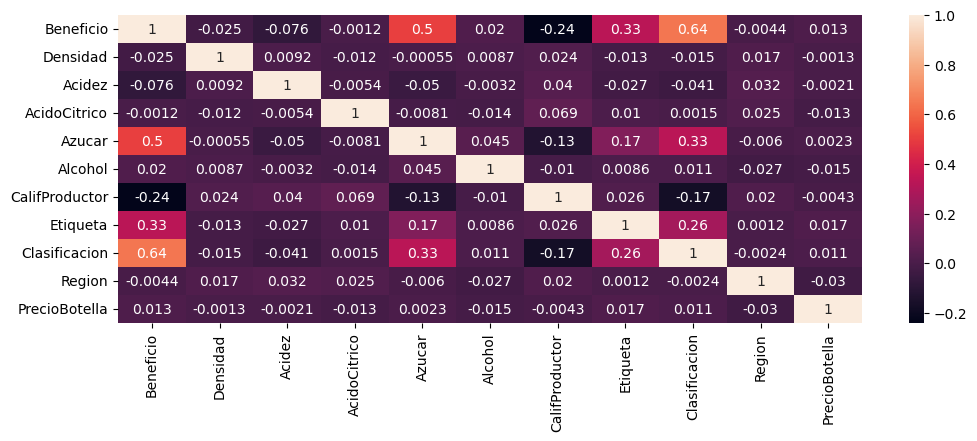


**** MÉTODO  DE THRESHOLD ****
Número de características generales 12
Número de características finales 2

Listado de características originales Index(['Beneficio', 'Compra', 'Densidad', 'Acidez', 'AcidoCitrico', 'Azucar',
       'Alcohol', 'CalifProductor', 'Etiqueta', 'Clasificacion', 'Region',
       'PrecioBotella'],
      dtype='object')

Listado de características finales Index(['Compra', 'Region'], dtype='object')



In [26]:
# # Hecho esto, voy a hacer una interpretación  gráfica bivariante usando la MATRIZ DE PEARSON, y comparando nuestra 
# # variable target, que es 'Compra' con el resto de variables que considero relevantes teniendo en cuenta lo que las personas
# # que entienden y les gusta el vino tienen en cuenta a la hora de elegir comprar un vino, como son la densidad, acidez, ácido
# # cítrico (que mejorará la acidez), azúcar, alcohol, región de donde provenga, precio de la botella y podría ser 
# # tambien la calificación del productor, clasificación y etiqueta. Después de todas estas también incluyo la variable Beneficio, 
# # porque la considero importante.

import seaborn as sns

# # # Creo una copia del dataframe eligiendo solo las columnas descritas anteriormente:
vinos_copy = vinos[['Beneficio', 'Compra', 'Densidad', 'Acidez', 'AcidoCitrico', 'Azucar', 'Alcohol', 'CalifProductor', 'Etiqueta', 'Clasificacion', 'Region', 'PrecioBotella']]

# Correlación de Pearson:
print('**** CORRELACIÓN DE PEARSON ****')
plt.figure(figsize = (12,4)) 
sns.heatmap(vinos_copy.corr(), annot= True) 
plt.show()

# # Hago la comprobación con el métodos de Threshold:

from sklearn.feature_selection import VarianceThreshold

print('\n**** MÉTODO  DE THRESHOLD ****')
var_th = VarianceThreshold(threshold = 0.07)
x_var = var_th.fit_transform(vinos_copy)
print(f"Número de características generales {vinos_copy.shape[1]}") 
print(f"Número de características finales {x_var.shape[1]}\n") 
print(f"Listado de características originales {vinos_copy.columns}\n") 
print(f"Listado de características finales {vinos_copy.columns[var_th.get_support()]}\n")

# Viendo los resultados de los métodos, voy a quedarme con las variables Region como más relevante

In [17]:
# Hecha la transformación de mis variables, voy a aplicar una "Regresion Logistica" empleando como 'Target' la variable 'Compra'
# y suando la técnica K-folds con la métrica accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

#Creo los datos de entramiento
x = vinos_copy[['Region']]  # Selecciona las columnas deseadas
y = vinos_copy['Compra']  # Selecciona la columna target

#Divido el dataset y lo repetiré 3 veces:
kfold = KFold(n_splits = 10)

#Entrenamos y testeamos:
model = LogisticRegression()
metrica = "accuracy"
result = cross_val_score(model, x, y, cv=kfold, scoring=metrica)

print(f"El cross val score obtenido para cada repetición con la métrica accuracy es: {result}")
print(f"La media del cross val score con la métrica accuracy es {round (result.mean(),4)*100}%")

El cross val score obtenido para cada repetición con la métrica accuracy es: [0.46624804 1.         0.89952904 1.         1.         1.
 1.         1.         0.48584906 0.        ]
La media del cross val score con la métrica accuracy es 78.52%


In [18]:
# Hecha la transformación de mis variables, voy a aplicar una "Regresion Logistica" empleando como 'Target' la variable 'Compra'
# y suando la técnica K-folds con la métrica precision

#Entrenamos y testeamos:
model = LogisticRegression()
metrica = "precision"
results2 = cross_val_score(model, x, y, cv=kfold, scoring=metrica)

print(f"El cross val score obtenido para cada repetición con la métrica precision es: {results2}")
print(f"La media del cross val score con la métrica precision es {round (results2.mean(),4)*100}%")

El cross val score obtenido para cada repetición con la métrica precision es: [0.46624804 1.         0.89952904 1.         1.         1.
 1.         1.         0.48584906 0.        ]
La media del cross val score con la métrica precision es 78.52%


In [20]:
# Hecha la transformación de mis variables, voy a aplicar una "Regresion Logistica" empleando como 'Target' la variable 'Compra'
# y suando la técnica K-folds con la métrica recall

#Entrenamos y testeamos:
model = LogisticRegression()
metrica = "recall"
results3 = cross_val_score(model, x, y, cv=kfold, scoring=metrica)

print(f"El cross val score obtenido para cada repetición con la métrica recall es: {results3}")
print(f"La media del cross val score con la métrica recall es {round (results3.mean(),4)*100}%")

El cross val score obtenido para cada repetición con la métrica recall es: [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
La media del cross val score con la métrica recall es 90.0%


C:\Users\34647\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Hecha la transformación de mis variables, voy a aplicar una "Regresion Logistica" empleando como 'Target' la variable 'Compra'
# y suando la técnica K-folds con la métrica F1 – Score

#Entrenamos y testeamos:
model = LogisticRegression()
metrica = "f1"
results4 = cross_val_score(model, x, y, cv=kfold, scoring=metrica)

print(f"El cross val score obtenido para cada repetición con la métrica F1 – Score es: {results4}")
print(f"La media del cross val score con la métrica F1 – Score es {round (results4.mean(),4)*100}%")

El cross val score obtenido para cada repetición con la métrica F1 – Score es: [0.6359743  1.         0.94710744 1.         1.         1.
 1.         1.         0.65396825 0.        ]
La media del cross val score con la métrica F1 – Score es 82.37%


In [27]:
# Matriz de confusión:

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

#Divido los datos en train y test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Entrenamos y testeamos
model = LogisticRegression() 
model.fit(x_train,y_train) 
predicted = model.predict(x_test) 
matrix = confusion_matrix(y_test, predicted)
print (matrix)

[[   0  471]
 [   0 1630]]
